# GridSearch

In this lab we will try to find the visualise the effect of increasing
depth in a decision tree, and then try to create the best possible decision tree.


In [72]:
# Do the usual tasks to load the Titanic data
import pandas
titanic = pandas.read_csv('C:/Users/mohds/SYD_DAT_5/data/titanic.csv', index_col='PassengerId')
titanic['Gender'] = [0 if x == 'male' else 1 for x in titanic.Sex]
feature_cols = ['Pclass', 'Parch', 'Age', 'Gender']
good_data = titanic[titanic.Age.notnull()]
X = good_data[feature_cols]
y = good_data.Survived

In [73]:
# Import the sklearn libraries for grid_search and tree
import sklearn.tree as skt
import sklearn.grid_search as skg

In [74]:
# Create a decision tree classifier
titanic_classifier = skt.DecisionTreeClassifier()

In [75]:
# Initially, we will just explore the effect of increasing
# the max_depth parameter.
# Create a dictionary which has a key of 'max_depth' and
# a value of the numbers between 1 and 20
depth = range(1,20)
params = {'max_depth': depth}

In [76]:
# Create a GridSearchCV object. It will need two parameters:
# - the decision tree classifier (from two cells back)
# - the parameters dictionary (from the previous cell)
# There is an optional "cv" parameter which you might want
# to explore later.
brute_force = skg.GridSearchCV(titanic_classifier, params)

In [77]:
# Use the GridSearchCV to fit the X and y data
brute_force.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [78]:
# What does the best_params_ attribute say?
brute_force.best_params_

{'max_depth': 2}

In [79]:
# What about the best_score_ attribute?
brute_force.best_score_

0.79411764705882348

In [80]:
# We can see how this compares with other values.
# The grid_scores_ attribute of the GridSearchCV object
# is now a list. Print it out
brute_force.grid_scores_

[mean: 0.78011, std: 0.01121, params: {'max_depth': 1},
 mean: 0.79412, std: 0.01436, params: {'max_depth': 2},
 mean: 0.77171, std: 0.02918, params: {'max_depth': 3},
 mean: 0.77591, std: 0.03035, params: {'max_depth': 4},
 mean: 0.78011, std: 0.02381, params: {'max_depth': 5},
 mean: 0.78992, std: 0.01185, params: {'max_depth': 6},
 mean: 0.77731, std: 0.01496, params: {'max_depth': 7},
 mean: 0.78431, std: 0.01815, params: {'max_depth': 8},
 mean: 0.78151, std: 0.01838, params: {'max_depth': 9},
 mean: 0.78992, std: 0.02517, params: {'max_depth': 10},
 mean: 0.78711, std: 0.01653, params: {'max_depth': 11},
 mean: 0.78151, std: 0.02015, params: {'max_depth': 12},
 mean: 0.78571, std: 0.01426, params: {'max_depth': 13},
 mean: 0.78571, std: 0.01426, params: {'max_depth': 14},
 mean: 0.78711, std: 0.01229, params: {'max_depth': 15},
 mean: 0.78711, std: 0.01518, params: {'max_depth': 16},
 mean: 0.78852, std: 0.01321, params: {'max_depth': 17},
 mean: 0.78992, std: 0.01124, params: {'

In [81]:
# Each element of this list is a 3-tuple. The middle element
# is the score. You can use
#  [x[1] for result in YOUR_GRID_VARIABLE.grid_scores_]
# to display it
scores = [result[1] for result in brute_force.grid_scores_]
scores

[0.78011204481792717,
 0.79411764705882348,
 0.77170868347338939,
 0.77591036414565828,
 0.78011204481792717,
 0.78991596638655459,
 0.77731092436974791,
 0.78431372549019607,
 0.78151260504201681,
 0.78991596638655459,
 0.78711484593837533,
 0.78151260504201681,
 0.7857142857142857,
 0.7857142857142857,
 0.78711484593837533,
 0.78711484593837533,
 0.78851540616246496,
 0.78991596638655459,
 0.78851540616246496]

In [82]:
# Import matplotlib.pyplot; remember to do %matplotlib inline first
%matplotlib inline
import matplotlib.pyplot as mp

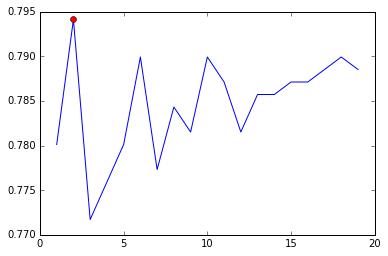

In [83]:
# Use matplotlib.pyplot.plot to plot these grid_scores_
# Once you have that working, use pyplot.plot to also add
# a marker on the best_score (pass 'ro' as the third argument
# to get a red circle on it)
mp.plot(depth, scores)
mp.plot(brute_force.best_params_['max_depth'], brute_force.best_score_, 'ro')

In [84]:
# If you have Graphviz and pydot installed and working,
# display the resulting decision tree
import StringIO
import IPython.display
import pydotplus
best_classifier = skt.DecisionTreeClassifier(max_depth=2)
file_obj = StringIO.StringIO()
skt.export_graphviz(best_classifier, out_file = file_obj)
graph = pydotplus.graph_from_dot_data(file_obj.getvalue())
IPython.display.Image(graph.create_png())

AttributeError: 'NoneType' object has no attribute 'children_left'

## Brute-force every option (optional)

In [85]:
# Create a new GridSearchCV object and a new parameters
# dictionary. This time, try all combinations of parameters
# max_features (from 1 to 4 inclusive), max_depth (from 1 to 20)
# criterion ('gini' or 'entropy').
# What is the best decision tree you can make?
new_params = {'max_depth': depth, 'criterion': ['gini', 'entropy'], 'max_features': range(1,4)}

In [86]:
new_brute_force = skg.GridSearchCV(titanic_classifier, new_params)

In [87]:
new_brute_force.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [88]:
new_brute_force.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 1}

In [89]:
new_brute_force.best_score_

0.80532212885154064